# Classificação binária

Temos um banco de dados com algumas informações sobre automóveis de uma plataforma de venda. Precisamos saber se, a partir dessas características o automóvel será vendido ou não.

## Tratando os dados

In [1]:
# bibliotecas
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [2]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
# renomeando as colunas
a_renomear = {
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_do_modelo',
    'price': 'preco',
    'sold': 'vendido'
}

dados.rename(columns = a_renomear, inplace = True)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
# trocando as categorias do vendido para binário
a_trocar = {
    'no': 0,
    'yes': 1
}

dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [5]:
# calculando a idade do modelo
ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [6]:
# calculando km por ano
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,22,35085.22134
1,1,7843,1998,40557.96,1,24,12622.05362
2,2,7109,2006,89627.50,0,16,11440.79806
3,3,26823,2015,95276.14,0,7,43167.32682
4,4,7935,2014,117384.68,1,8,12770.11290


## Modelo de classificação linear

In [7]:
# selecionando os dados para o modelo
x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

In [8]:
seed = 5
np.random.seed(seed)

# separando os dados de treino e de teste
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, stratify=y)
print('Treinaremos com %d observações e testaremos com %d.' % (len(treino_x), len(teste_x)))

# ajustando o modelo
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia foi %.2f%%.' % acuracia)

Treinaremos com 7500 observações e testaremos com 2500.
A acurácia foi 46.88%.


c:\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Validando com um modelo bobo

In [9]:
dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoes_dummy = dummy.predict(teste_x)

acuracia_dummy = accuracy_score(teste_y, previsoes_dummy) * 100
print('A acurácia do modelo dummy proporcional foi %.2f%%.' % acuracia_dummy)

A acurácia do modelo dummy proporcional foi 58.00%.


In [14]:
dummy_most_frequent = DummyClassifier(strategy = 'most_frequent')
dummy_most_frequent.fit(treino_x, treino_y)
previsoes_dummy = dummy_most_frequent.predict(teste_x)

acuracia_dummy = accuracy_score(teste_y, previsoes_dummy) * 100
print('A acurácia do modelo dummy mais frequente foi %.2f%%.' % acuracia_dummy)

A acurácia do modelo dummy mais frequente foi 58.00%.


Vemos então, que o modelo linear pode ser pior que os estimadores simples. Então vamos testar com o modelo não-linear.

## Modelo de classificação não-linear

In [11]:
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,  stratify=y)
print('Treinaremos com %d observações e testaremos com %d.' % (len(treino_x), len(teste_x)))

# padronizando as variáveis
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

# ajustando o modelo
modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)

# avaliando o modelo
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia foi %.2f%%' % acuracia)

Treinaremos com 7500 observações e testaremos com 2500.
A acurácia foi 76.68%


Já percebemos uma melhora na acurácia do modelo, mas como o modelo está decidindo? Para isso, vamos usar um modelo de Árvore de Decisão

## Modelo de árvore de decisão

In [18]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,  stratify=y)
print('Treinaremos com %d observações e testaremos com %d.' % (len(treino_x), len(teste_x)))

# ajustando o modelo
modelo = DecisionTreeClassifier(max_depth = 3)
modelo.fit(treino_x, treino_y)

# avaliando o modelo
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia foi %.2f%%' % acuracia)

Treinaremos com 7500 observações e testaremos com 2500.
A acurácia foi 78.84%


Mesmo que o modelo tenha um resultado pior, ele pode ser interessante para poder entender o seu processo de decisão.

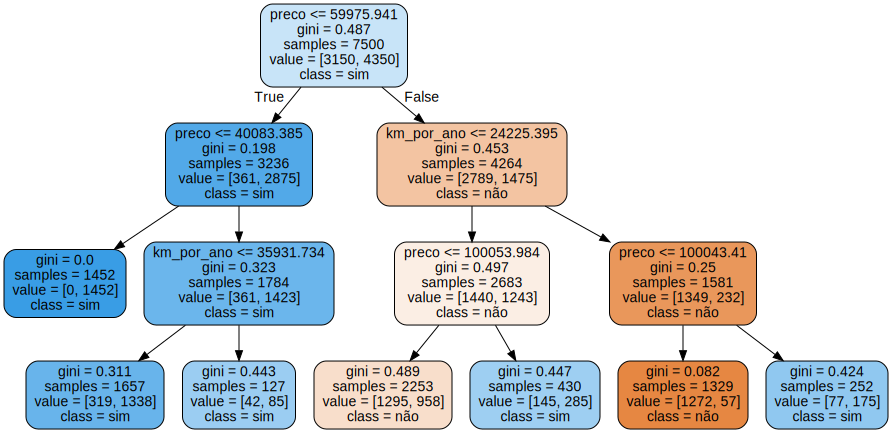

In [19]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, filled = True, rounded=True, feature_names=features, class_names=['não', 'sim'])
grafico = graphviz.Source(dot_data)
grafico